In [1]:

import importlib
import Util
importlib.reload(Util)
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import numpy as np
import dask

In [2]:
infile1_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_1/output/MOST_PLA.*.nc"
infile2_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_2/output/MOST_PLA.*.nc"
infile3_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_3/output/MOST_PLA.*.nc"
infile4_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_4/output/MOST_PLA.*.nc"
infile6_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_6/output/MOST_PLA.*.nc"
infile8_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_8/output/MOST_PLA.*.nc"
infile12_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_12/output/MOST_PLA.*.nc"
infile16_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_16/output/MOST_PLA.*.nc"

In [3]:
data1ml = Util.open_mfdataset_plasim_monthly (infile1_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data2ml = Util.open_mfdataset_plasim_monthly (infile2_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data3ml = Util.open_mfdataset_plasim_monthly (infile3_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data4ml = Util.open_mfdataset_plasim_monthly (infile4_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data6ml = Util.open_mfdataset_plasim_monthly (infile6_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data8ml = Util.open_mfdataset_plasim_monthly (infile8_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data12ml = Util.open_mfdataset_plasim_monthly (infile12_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data16ml = Util.open_mfdataset_plasim_monthly (infile16_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

/usr/lib/python3/dist-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
xarray_plugin module needs xarray version >= 0.18+
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
t1_ml= data1ml.tas
t2_ml= data2ml.tas
t3_ml= data3ml.tas
#t4_ml= data4ml
t6_ml= data6ml.tas
t8_ml= data8ml.tas
t12_ml= data12ml.tas
t16_ml= data16ml.tas

In [5]:
t1_ml

<xarray.DataArray 'tas' (time: 1800, lat: 32, lon: 64)>
dask.array<concatenate, shape=(1800, 32, 64), dtype=float32, chunksize=(12, 32, 64), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0150-12-01 00:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Attributes:
    long_name:         Temperature at 2m
    units:             K
    code:              167
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  16
    cell_methods:      time: mean

In [5]:
teq_1_ml= data1ml.tas.isel(time=range(50*12, 150*12))
teq_2_ml= data2ml.tas.isel(time=range(50*12, 150*12))
teq_3_ml= data3ml.tas.isel(time=range(50*12, 150*12))
#teq_4_ml= data4ml.tas.isel(time=range(50*12, 150*12))
teq_6_ml= data6ml.tas.isel(time=range(50*12, 150*12))
teq_8_ml= data8ml.tas.isel(time=range(50*12, 150*12))
teq_12_ml= data12ml.tas.isel(time=range(50*12, 150*12))
teq_16_ml= data16ml.tas.isel(time=range(50*12, 150*12))

In [ ]:
#land_sea_mask.lon
#lsm = land_sea_mask.copy()
#lsm = lsm.assign_coords(lon = (((lsm.lon + 180) % 360) - 180))
#lsm.lon

PLOT OF TEMPERATURE ON NEW LSM IN PALEOCLIMATE

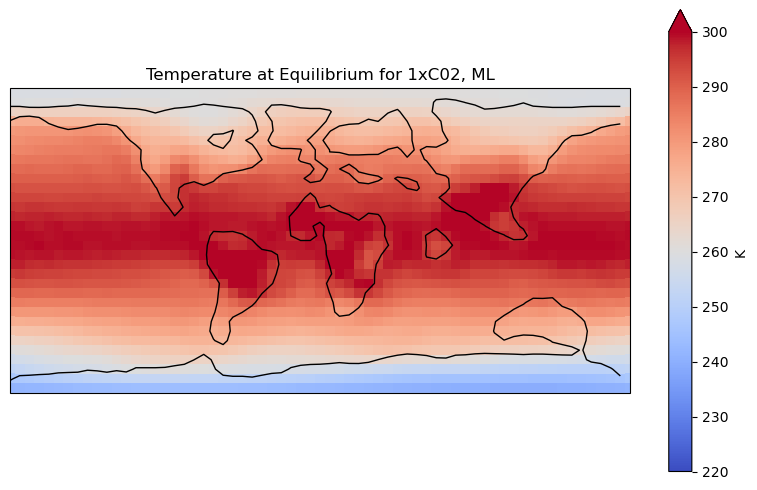

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load land-sea mask
mask_ds = xr.open_dataset("/home/ighirardo/work/plasim/exp/test_h_ml/lsm.nc")
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# --- Assuming teq_ml_1 is already loaded ---
# 1. Time average
teq_1_ml = teq_1_ml.mean(dim='time')

# 2. Roll longitudes and reassign to -180 to 180
teq_1_ml= teq_1_ml.roll(lon=len(teq_1_ml['lon']) // 2, roll_coords=True)
new_lon = np.linspace(-180, 180, len(teq_1_ml['lon']), endpoint=False)
teq_1_ml['lon'] = new_lon

# 3. Roll land-sea mask too (to match longitude)
mask_ds = mask_ds.roll(lon=len(mask_ds['lon']) // 2, roll_coords=True)
mask_ds['lon'] = np.linspace(-180, 180, len(mask_ds['lon']), endpoint=False)
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# 4. Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

teq_1_ml.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',
              cbar_kwargs={'label': 'K'}, vmin=220, vmax=300)

ax.contour(mask_ds['lon'], mask_ds['lat'], land_sea_mask,
           levels=[0.5], colors='black', linewidths=1, transform=ccrs.PlateCarree())

ax.set_title("Temperature at Equilibrium for 1xC02, ML")
plt.show()

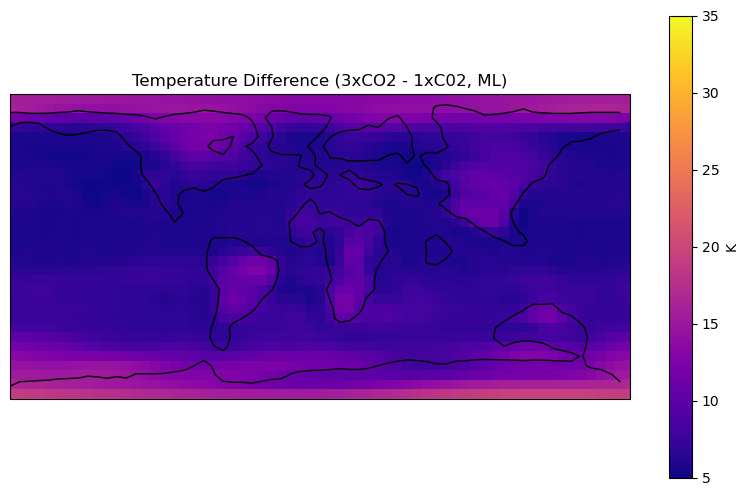

In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load land-sea mask
mask_ds = xr.open_dataset("/home/ighirardo/work/plasim/exp/test_h_ml/lsm.nc")
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# --- Assuming teq_ml_1 is already loaded ---
# 1. Time average
t_diff = teq_3_ml.mean(dim='time') - teq_1_ml.mean(dim='time')

# 2. Roll longitudes and reassign to -180 to 180
t_diff= t_diff.roll(lon=len(t_diff['lon']) // 2, roll_coords=True)
new_lon = np.linspace(-180, 180, len(t_diff['lon']), endpoint=False)
t_diff['lon'] = new_lon

# 3. Roll land-sea mask too (to match longitude)
mask_ds = mask_ds.roll(lon=len(mask_ds['lon']) // 2, roll_coords=True)
mask_ds['lon'] = np.linspace(-180, 180, len(mask_ds['lon']), endpoint=False)
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# 4. Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

t_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma',
              cbar_kwargs={'label': 'K'}, vmin=5, vmax=35)

ax.contour(mask_ds['lon'], mask_ds['lat'], land_sea_mask,
           levels=[0.5], colors='black', linewidths=1, transform=ccrs.PlateCarree())

ax.set_title("Temperature Difference (3xCO2 - 1xC02, ML)")
plt.show()

SIMPLE PLOTS USING PRESENT DAY LSM; SWTICH TO THE ONE ABOVE

In [8]:
teq_1_ml= data1ml.tas.isel(time=range(50*12, 150*12))
teq_2_ml= data2ml.tas.isel(time=range(50*12, 150*12))
teq_3_ml= data3ml.tas.isel(time=range(50*12, 150*12))
#teq_4_ml= data4ml.tas.isel(time=range(50*12, 150*12))
teq_6_ml= data6ml.tas.isel(time=range(50*12, 150*12))
teq_8_ml= data8ml.tas.isel(time=range(50*12, 150*12))
teq_12_ml= data12ml.tas.isel(time=range(50*12, 150*12))
teq_16_ml= data16ml.tas.isel(time=range(50*12, 150*12))

Text(0.5, 1.0, 'Temperature Difference (16xCO2 - 1xCO2, ML)')

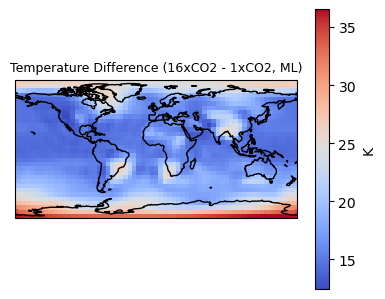

In [9]:
import cartopy.crs as ccrs

t_plot= teq_16_ml.mean(dim='time')- teq_1_ml.mean(dim='time')

title = "Temperature Difference (16xCO2 - 1xCO2, ML)"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="K", nx=2, ny=2, nn=1, cmap='coolwarm')

ax.set_title(title, fontsize=9) 

In [10]:
tseq_1_ml= data1ml.ts.isel(time=range(50*12, 150*12))
tseq_2_ml= data2ml.ts.isel(time=range(50*12, 150*12))
tseq_3_ml= data3ml.ts.isel(time=range(50*12, 150*12))
#teq_4_ml= data4ml.tas.isel(time=range(50*12, 150*12))
tseq_6_ml= data6ml.ts.isel(time=range(50*12, 150*12))
tseq_8_ml= data8ml.ts.isel(time=range(50*12, 150*12))
tseq_12_ml= data12ml.ts.isel(time=range(50*12, 150*12))
tseq_16_ml= data16ml.ts.isel(time=range(50*12, 150*12))

Text(0.5, 1.0, 'Surface Temperature at Equilibrium for 1xCO2')

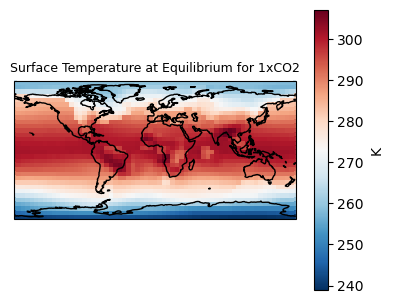

In [11]:
import cartopy.crs as ccrs

t_plot= tseq_1_ml.mean(dim='time')

title = "Surface Temperature at Equilibrium for 1xCO2"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="K", nx=2, ny=2, nn=1, cmap='RdBu_r')

ax.set_title(title, fontsize=9) 

In [12]:
peq_1_ml = (data1ml.prc + data1ml.prl).isel(time=slice(50*12, 150*12))
peq_2_ml = (data2ml.prc + data2ml.prl).isel(time=slice(50*12, 150*12))
peq_3_ml = (data3ml.prc + data3ml.prl).isel(time=slice(50*12, 150*12))
#peq_4_ml = (data4ml.prc + data4ml.prl).isel(time=slice(50*12, 150*12))
peq_6_ml = (data6ml.prc + data6ml.prl).isel(time=slice(50*12, 150*12))
peq_8_ml = (data8ml.prc + data8ml.prl).isel(time=slice(50*12, 150*12))
peq_12_ml = (data12ml.prc + data12ml.prl).isel(time=slice(50*12, 150*12))
peq_16_ml = (data16ml.prc + data16ml.prl).isel(time=slice(50*12, 150*12))

Text(0.5, 1.0, 'Precipitation (Large Scale+Convective) for 3xCO2')

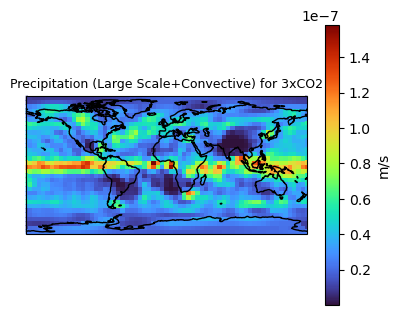

In [13]:
import cartopy.crs as ccrs

t_plot= peq_3_ml.mean(dim='time')

title = "Precipitation (Large Scale+Convective) for 3xCO2"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="m/s", nx=2, ny=2, nn=1, cmap='turbo')

ax.set_title(title, fontsize=9) 

SEA ICE COVER

In [14]:
infile1_ml_ice="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_1/output/MOST_ICE.*.nc"
infile3_ml_ice="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_3/output/MOST_ICE.*.nc"
infile6_ml_ice="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_6/output/MOST_ICE.*.nc"
infile12_ml_ice="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_12/output/MOST_ICE.*.nc"
infile16_ml_ice="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_16/output/MOST_ICE.*.nc"

In [15]:
data1ml_ice = Util.open_mfdataset_plasim_monthly (infile1_ml_ice, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data3ml_ice = Util.open_mfdataset_plasim_monthly (infile3_ml_ice, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data6ml_ice = Util.open_mfdataset_plasim_monthly (infile6_ml_ice, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data12ml_ice = Util.open_mfdataset_plasim_monthly (infile12_ml_ice, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data16ml_ice = Util.open_mfdataset_plasim_monthly (infile16_ml_ice, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [19]:
data1ml_ice.var 
data1ml_ice.icecc
# ice cover computed prognostically

<xarray.DataArray 'icecc' (time: 1800, lat: 32, lon: 64)>
dask.array<concatenate, shape=(1800, 32, 64), dtype=float32, chunksize=(12, 32, 64), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0150-12-01 00:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Attributes:
    long_name:         Ice cover computed prognostically
    units:             frac.
    code:              792
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  16
    cell_methods:      time: mean

In [16]:
ice_eq_1_ml= data1ml_ice.icec.isel(time=range(50*12, 150*12))
ice_eq_3_ml= data3ml_ice.icec.isel(time=range(50*12, 150*12))
ice_eq_6_ml= data6ml_ice.icec.isel(time=range(50*12, 150*12))
ice_eq_12_ml= data12ml_ice.icec.isel(time=range(50*12, 150*12))
ice_eq_16_ml= data16ml_ice.icec.isel(time=range(50*12, 150*12))

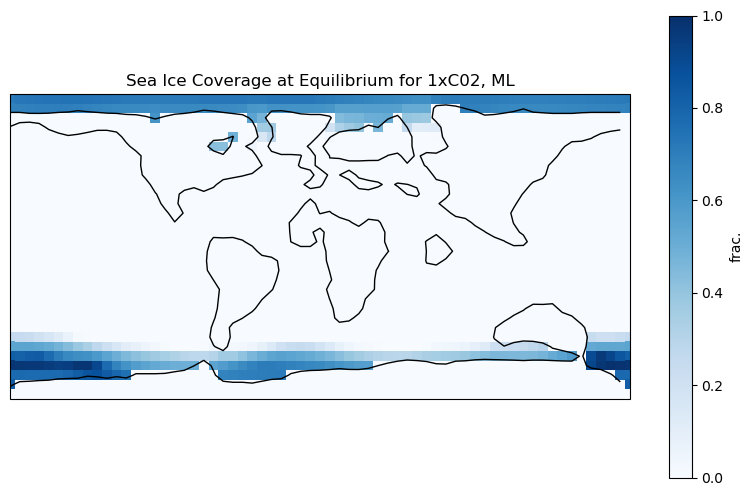

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load land-sea mask
mask_ds = xr.open_dataset("/home/ighirardo/work/plasim/exp/test_h_ml/lsm.nc")
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

ice_eq_1_ml = ice_eq_1_ml.mean(dim='time')

# 2. Roll longitudes and reassign to -180 to 180
ice_eq_1_ml= ice_eq_1_ml.roll(lon=len(ice_eq_1_ml['lon']) // 2, roll_coords=True)
new_lon = np.linspace(-180, 180, len(ice_eq_1_ml['lon']), endpoint=False)
ice_eq_1_ml['lon'] = new_lon

# 3. Roll land-sea mask too (to match longitude)
mask_ds = mask_ds.roll(lon=len(mask_ds['lon']) // 2, roll_coords=True)
mask_ds['lon'] = np.linspace(-180, 180, len(mask_ds['lon']), endpoint=False)
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# 4. Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ice_eq_1_ml.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues',
              cbar_kwargs={'label': 'frac.'}, vmin=0, vmax=1)

ax.contour(mask_ds['lon'], mask_ds['lat'], land_sea_mask,
           levels=[0.5], colors='black', linewidths=1, transform=ccrs.PlateCarree())

ax.set_title("Sea Ice Coverage at Equilibrium for 1xC02, ML")
plt.show()

Text(0.5, 1.0, 'Difference in global mean temperature for various CO2 levels')

/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:376: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


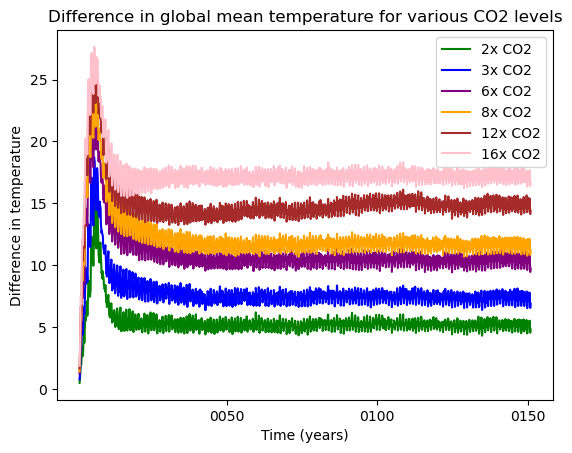

In [18]:
diff2 = Util.area_mean(t2_ml).compute() - Util.area_mean(t1_ml).compute()
diff3 = Util.area_mean(t3_ml).compute() - Util.area_mean(t1_ml).compute()
#diff4 = Util.area_mean(t4_ml).compute() - Util.area_mean(t1_ml).compute()
diff6 = Util.area_mean(t6_ml).compute() - Util.area_mean(t1_ml).compute()
diff8 = Util.area_mean(t8_ml).compute() - Util.area_mean(t1_ml).compute()
diff12 = Util.area_mean(t12_ml).compute() - Util.area_mean(t1_ml).compute()
diff16 = Util.area_mean(t16_ml).compute() - Util.area_mean(t1_ml).compute()

diff2.plot(color='green')
diff3.plot(color='blue')
#diff4.plot(color='red')
diff6.plot(color='purple')
diff8.plot(color='orange')
diff12.plot(color='brown')
diff16.plot(color='pink')

plt.xlabel('Time (years)')
plt.ylabel('Difference in temperature')

plt.legend(['2x CO2', '3x CO2', '6x CO2', '8x CO2', '12x CO2', '16x CO2'])
plt.title('Difference in global mean temperature for various CO2 levels')

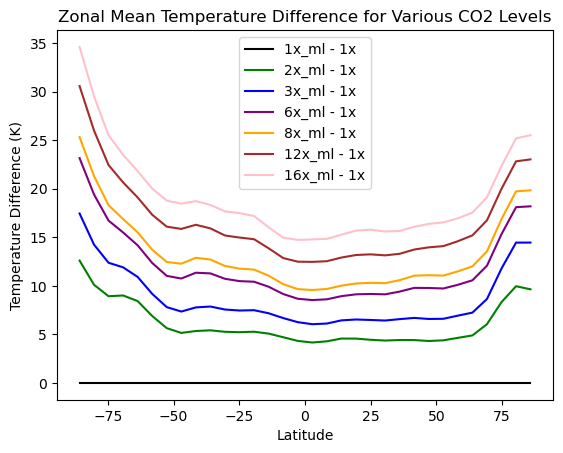

In [19]:
tas_diff_1ml = teq_1_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 1x_ml - 1x
tas_diff_2ml = teq_2_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 2x_ml - 1x
tas_diff_3ml = teq_3_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 3x_ml - 1x
tas_diff_6ml = teq_6_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 6x_ml - 1x
tas_diff_8ml = teq_8_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 8x_ml - 1x
tas_diff_12ml = teq_12_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 12x_ml - 1x
tas_diff_16ml = teq_16_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 16x_ml - 1x

tas_diff_1ml.plot(label='1x_ml - 1x', color='black')
tas_diff_2ml.plot(label='2x_ml - 1x', color='green')
tas_diff_3ml.plot(label='3x_ml - 1x', color='blue')
tas_diff_6ml.plot(label='6x_ml - 1x', color='purple')
tas_diff_8ml.plot(label='8x_ml - 1x', color='orange')
tas_diff_12ml.plot(label='12x_ml - 1x', color='brown')
tas_diff_16ml.plot(label='16x_ml - 1x', color='pink')

plt.xlabel('Latitude')
plt.ylabel('Temperature Difference (K)')
plt.legend()
plt.title('Zonal Mean Temperature Difference for Various CO2 Levels')
plt.show()

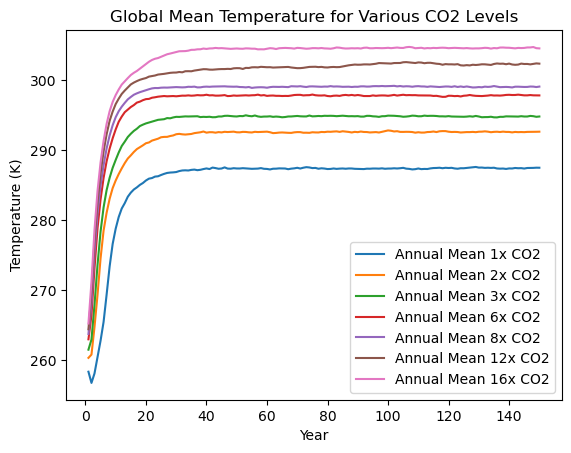

In [20]:
annual_mean1 = Util.area_mean(t1_ml).groupby("time.year").mean("time")
annual_mean2 = Util.area_mean(t2_ml).groupby("time.year").mean("time")
annual_mean3 = Util.area_mean(t3_ml).groupby("time.year").mean("time")
#annual_mean4 = Util.area_mean(t4).groupby("time.year").mean("time")
annual_mean6 = Util.area_mean(t6_ml).groupby("time.year").mean("time")
annual_mean8 = Util.area_mean(t8_ml).groupby("time.year").mean("time")
annual_mean12 = Util.area_mean(t12_ml).groupby("time.year").mean("time")
annual_mean16 = Util.area_mean(t16_ml).groupby("time.year").mean("time")

annual_mean1.plot(label="Annual Mean 1x CO2")
annual_mean2.plot(label="Annual Mean 2x CO2")
annual_mean3.plot(label="Annual Mean 3x CO2")
#annual_mean4.plot(label="Annual Mean 4x CO2")
annual_mean6.plot(label="Annual Mean 6x CO2")
annual_mean8.plot(label="Annual Mean 8x CO2")
annual_mean12.plot(label="Annual Mean 12x CO2")
annual_mean16.plot(label="Annual Mean 16x CO2")

plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Global Mean Temperature for Various CO2 Levels')
plt.legend()

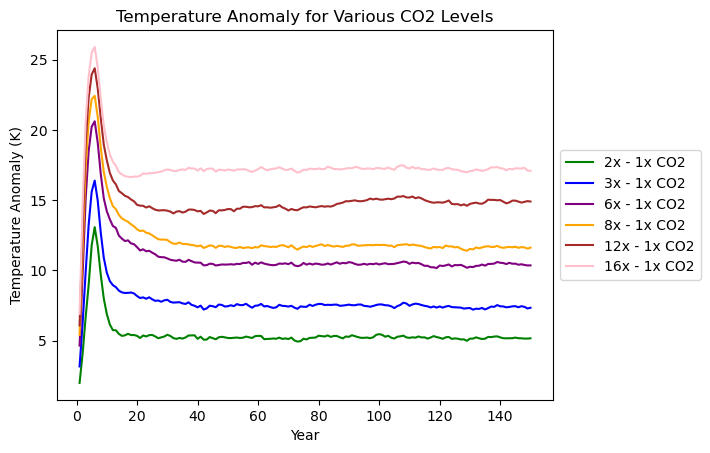

In [21]:
anomaly_2 = annual_mean2 - annual_mean1
anomaly_3 = annual_mean3 - annual_mean1
#anomaly_4 = annual_mean4 - annual_mean1
anomaly_6 = annual_mean6 - annual_mean1
anomaly_8 = annual_mean8 - annual_mean1
anomaly_12 = annual_mean12 - annual_mean1
anomaly_16 = annual_mean16 - annual_mean1

anomaly_2.plot(label="2x - 1x CO2", color='green')
anomaly_3.plot(label="3x - 1x CO2", color='blue')
#anomaly_4.plot(label="4x - 1x CO2", color='red')
anomaly_6.plot(label="6x - 1x CO2", color='purple')
anomaly_8.plot(label="8x - 1x CO2", color='orange')
anomaly_12.plot(label="12x - 1x CO2", color='brown')
anomaly_16.plot(label="16x - 1x CO2", color='pink')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (K)')
plt.title('Temperature Anomaly for Various CO2 Levels')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

COMPARISONS WITH PLASIM PRESENT-DAY MIXED LAYER

In [24]:
infile1_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test1_ml/output/MOST_PLA.*.nc"
infile2_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test2_ml/output/MOST_PLA.*.nc"
infile3_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test3_ml/output/MOST_PLA.*.nc"
infile4_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test4_ml/output/MOST_PLA.*.nc"
infile6_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test6_ml/output/MOST_PLA.*.nc"
infile8_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test8_ml/output/MOST_PLA.*.nc"
infile12_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test12_ml/output/MOST_PLA.*.nc"
infile16_pla_ml="/home/ighirardo/work/plasim/exp/test_pla_ml/test16_ml/output/MOST_PLA.*.nc"

In [25]:
data1_pla_ml = Util.open_mfdataset_plasim_monthly (infile1_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data2_pla_ml = Util.open_mfdataset_plasim_monthly (infile2_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data3_pla_ml = Util.open_mfdataset_plasim_monthly (infile3_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
#data4_pla_ml = Util.open_mfdataset_plasim_monthly (infile4_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data6_pla_ml = Util.open_mfdataset_plasim_monthly (infile6_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data8_pla_ml = Util.open_mfdataset_plasim_monthly (infile8_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data12_pla_ml = Util.open_mfdataset_plasim_monthly (infile12_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data16_pla_ml = Util.open_mfdataset_plasim_monthly (infile16_pla_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [26]:
teq_1_pla_ml= data1_pla_ml.tas.isel(time=range(50*12, 150*12))
teq_2_pla_ml= data2_pla_ml.tas.isel(time=range(50*12, 150*12))
teq_3_pla_ml= data3_pla_ml.tas.isel(time=range(50*12, 150*12))
#teq_4_pla_ml= data4_pla_ml.tas.isel(time=range(50*12, 600*12))
teq_6_pla_ml= data6_pla_ml.tas.isel(time=range(50*12, 150*12))
teq_8_pla_ml= data8_pla_ml.tas.isel(time=range(50*12, 150*12))
teq_12_pla_ml= data12_pla_ml.tas.isel(time=range(50*12, 150*12))
teq_16_pla_ml= data16_pla_ml.tas.isel(time=range(50*12, 150*12))

In [27]:
t1_pla_ml = data1_pla_ml.tas
t2_pla_ml = data2_pla_ml.tas
t3_pla_ml = data3_pla_ml.tas
#t4_pla_ml = data4_pla_ml.tas
t6_pla_ml = data6_pla_ml.tas
t8_pla_ml = data8_pla_ml.tas
t12_pla_ml = data12_pla_ml.tas
t16_pla_ml = data16_pla_ml.tas

Text(0.5, 1.0, 'Difference in global mean temperature for various CO2 levels')

/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:376: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/ighirardo/.local/lib/python3.10/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


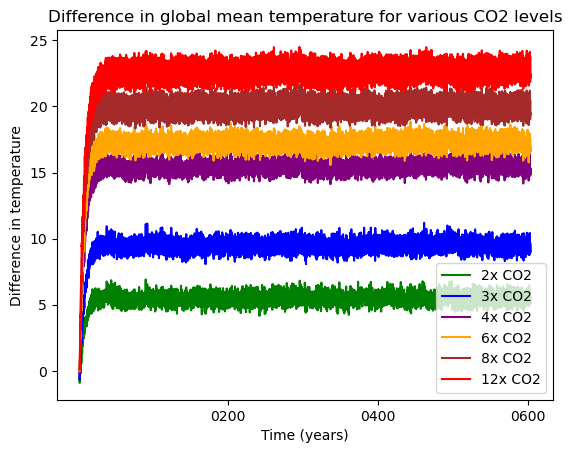

In [28]:
diff2 = Util.area_mean(t2_pla_ml).compute() - Util.area_mean(t1_pla_ml).compute()
diff3 = Util.area_mean(t3_pla_ml).compute() - Util.area_mean(t1_pla_ml).compute()
#diff4 = Util.area_mean(t4_pla_ml).compute() - Util.area_mean(t1_pla_ml).compute()
diff6 = Util.area_mean(t6_pla_ml).compute() - Util.area_mean(t1_pla_ml).compute()
diff8 = Util.area_mean(t8_pla_ml).compute() - Util.area_mean(t1_pla_ml).compute()
diff12 = Util.area_mean(t12_pla_ml).compute() - Util.area_mean(t1_pla_ml).compute()
diff16 = Util.area_mean(t16_pla_ml).compute() - Util.area_mean(t1_pla_ml).compute()

diff2.plot(color='green')
diff3.plot(color='blue')
#diff4.plot(color='red')
diff6.plot(color='purple')
diff8.plot(color='orange')
diff12.plot(color='brown')
diff16.plot(color='red')

plt.xlabel('Time (years)')
plt.ylabel('Difference in temperature')

plt.legend(['2x CO2', '3x CO2', '4x CO2', '6x CO2', '8x CO2', '12x CO2', '16x CO2'])
plt.title('Difference in global mean temperature for various CO2 levels')

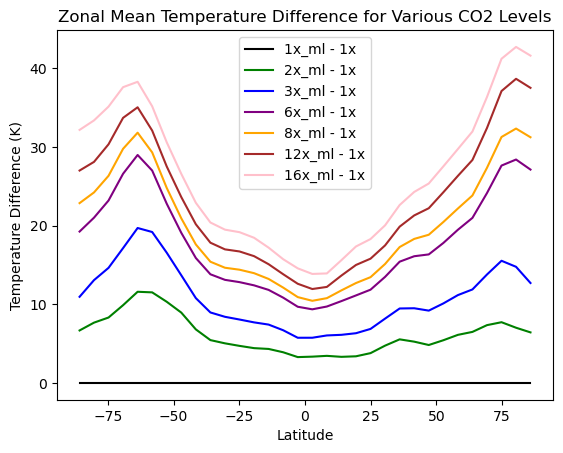

In [29]:
tas_diff_1_pla_ml = teq_1_pla_ml.mean(dim=('time', 'lon')) - teq_1_pla_ml.mean(dim=('time', 'lon')) # 1x_ml - 1x
tas_diff_2_pla_ml = teq_2_pla_ml.mean(dim=('time', 'lon')) - teq_1_pla_ml.mean(dim=('time', 'lon')) # 2x_ml - 1x
tas_diff_3_pla_ml = teq_3_pla_ml.mean(dim=('time', 'lon')) - teq_1_pla_ml.mean(dim=('time', 'lon')) # 3x_ml - 1x
tas_diff_6_pla_ml = teq_6_pla_ml.mean(dim=('time', 'lon')) - teq_1_pla_ml.mean(dim=('time', 'lon')) # 6x_ml - 1x
tas_diff_8_pla_ml = teq_8_pla_ml.mean(dim=('time', 'lon')) - teq_1_pla_ml.mean(dim=('time', 'lon')) # 8x_ml - 1x
tas_diff_12_pla_ml = teq_12_pla_ml.mean(dim=('time', 'lon')) - teq_1_pla_ml.mean(dim=('time', 'lon')) # 12x_ml - 1x
tas_diff_16_pla_ml = teq_16_pla_ml.mean(dim=('time', 'lon')) - teq_1_pla_ml.mean(dim=('time', 'lon')) # 16x_ml - 1x

tas_diff_1_pla_ml.plot(label='1x_ml - 1x', color='black')
tas_diff_2_pla_ml.plot(label='2x_ml - 1x', color='green')
tas_diff_3_pla_ml.plot(label='3x_ml - 1x', color='blue')
tas_diff_6_pla_ml.plot(label='6x_ml - 1x', color='purple')
tas_diff_8_pla_ml.plot(label='8x_ml - 1x', color='orange')
tas_diff_12_pla_ml.plot(label='12x_ml - 1x', color='brown')
tas_diff_16_pla_ml.plot(label='16x_ml - 1x', color='pink')

plt.xlabel('Latitude')
plt.ylabel('Temperature Difference (K)')
plt.legend()
plt.title('Zonal Mean Temperature Difference for Various CO2 Levels')
plt.show()

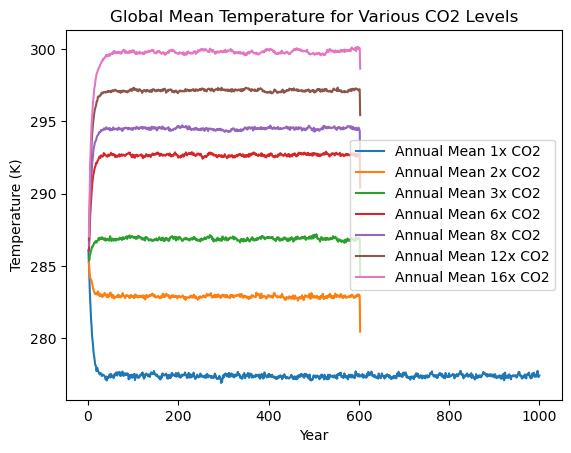

In [30]:
pla_annual_mean1 = Util.area_mean(t1_pla_ml).groupby("time.year").mean("time")
pla_annual_mean2 = Util.area_mean(t2_pla_ml).groupby("time.year").mean("time")
pla_annual_mean3 = Util.area_mean(t3_pla_ml).groupby("time.year").mean("time")
#annual_mean4 = Util.area_mean(t4).groupby("time.year").mean("time")
pla_annual_mean6 = Util.area_mean(t6_pla_ml).groupby("time.year").mean("time")
pla_annual_mean8 = Util.area_mean(t8_pla_ml).groupby("time.year").mean("time")
pla_annual_mean12 = Util.area_mean(t12_pla_ml).groupby("time.year").mean("time")
pla_annual_mean16 = Util.area_mean(t16_pla_ml).groupby("time.year").mean("time")

pla_annual_mean1.plot(label="Annual Mean 1x CO2")
pla_annual_mean2.plot(label="Annual Mean 2x CO2")
pla_annual_mean3.plot(label="Annual Mean 3x CO2")
#annual_mean4.plot(label="Annual Mean 4x CO2")
pla_annual_mean6.plot(label="Annual Mean 6x CO2")
pla_annual_mean8.plot(label="Annual Mean 8x CO2")
pla_annual_mean12.plot(label="Annual Mean 12x CO2")
pla_annual_mean16.plot(label="Annual Mean 16x CO2")

plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Global Mean Temperature for Various CO2 Levels')
plt.legend()

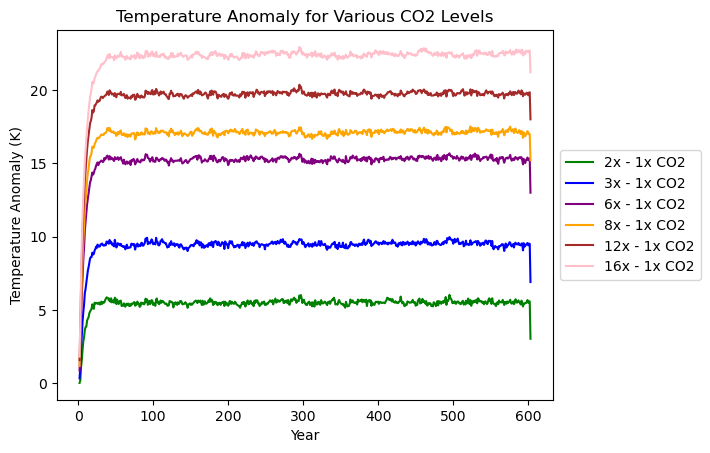

In [31]:
pla_anomaly_2 = pla_annual_mean2 - pla_annual_mean1
pla_anomaly_3 = pla_annual_mean3 - pla_annual_mean1
#anomaly_4 = annual_mean4 - annual_mean1
pla_anomaly_6 = pla_annual_mean6 - pla_annual_mean1
pla_anomaly_8 = pla_annual_mean8 - pla_annual_mean1
pla_anomaly_12 = pla_annual_mean12 - pla_annual_mean1
pla_anomaly_16 = pla_annual_mean16 - pla_annual_mean1

pla_anomaly_2.plot(label="2x - 1x CO2", color='green')
pla_anomaly_3.plot(label="3x - 1x CO2", color='blue')
#anomaly_4.plot(label="4x - 1x CO2", color='red')
pla_anomaly_6.plot(label="6x - 1x CO2", color='purple')
pla_anomaly_8.plot(label="8x - 1x CO2", color='orange')
pla_anomaly_12.plot(label="12x - 1x CO2", color='brown')
pla_anomaly_16.plot(label="16x - 1x CO2", color='pink')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (K)')
plt.title('Temperature Anomaly for Various CO2 Levels')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

FOR QUICK 2D MAPS OF T AND OTHERS

Text(0.5, 1.0, 'Temperature Difference (16xCO2 - 1xCO2, ML)')

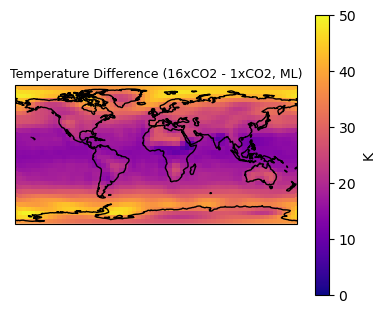

In [33]:
import cartopy.crs as ccrs

t_plot= teq_16_pla_ml.mean(dim='time')- teq_1_pla_ml.mean(dim='time')

title = "Temperature Difference (16xCO2 - 1xCO2, ML)"
fig,ax = Util.v_plot_map_2D(t_plot, title=title, units="K", nx=2, ny=2, nn=1, cmap='plasma', vmin=0, vmax=50)

ax.set_title(title, fontsize=9) 